Qualité de l'apprentissage
==========
Ce notebook permet d'illustrer différents aspects de la qualité de l'apprentissage (biais-variance, sur et sous-apprentissage) en utilisant [la régression polynomiale](https://fr.wikipedia.org/wiki/R%C3%A9gression_polynomiale) dans le contexte d'une variable explicative.  
Nous nous intéressons pas à la théorie sous-jacente aux modèles de régression polynomiale.

Now its important to realise that in data science you will rarely use this kind of simple 2-dimensional modelling.  The problem is stylised, and you rarely get simple Gaussian noise like this.  In many ways this is a trivial, unrealistic example of learning and statistics.  However, the simple nature of the material means we can carefully study the different aspects of learning, and discuss some of the behaviour that theory tells us about.  So this is excellent material for a tutorial.

Régression polynomiale
----------
On cherche à expliquer/prédire $y$ à partir d'une seule variable explicative $x$. Par example, un modèle de régression quadratique estimera $y$ en utilisant la fonction $f$ suivante :
  $$y\approx f(x)=a_0\times 1 + a_1\times x + a_2\times x^2$$
où les trois paramètres à *apprendre* sont $(a,b,c)$. La fonction $f$ est donc une combinaison linéaire de *fonctions basiques* de $x$ : $(1,x,x^2)$.  

La Figure ci-dessous montre des courbes tracées pour différenres valeurs des paramètres $(a,b,c)$.

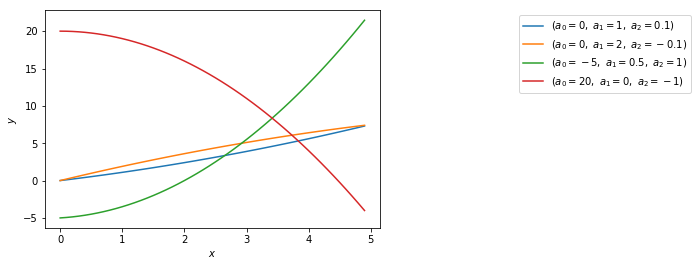

In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy

# Générer des points entre (0,5)
x = numpy.arange(0., 5., 0.1)

def makelabel(a,b,c):
    return r'$(a_0=' + str(a0) + ',\ a_1=' + str(a1) + ',\ a_2=' + str(a2) + ')$'

# Courbes pour différentes valeurs des paramètres
[a0,a1,a2]  = [0,1,0.1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [0,2,-0.1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [-5,0.5,1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [20,0,-1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
pl.legend(bbox_to_anchor=(1.4, 1.0))
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
pl.show()

Dans le cadre d'une régression polynomiale de degré $n$ (aussi appelé *ordre*), on cherche $n+1$ coefficients tel que
$$y\approx f(x) = a_0 + a_1x + a_2x^2 + \cdots a_nx_n = \sum_{i=0}^n a_ix^i $$

# Construction d'un jeu de données synthétique
Nous allons construire ici un jeu de données synthétique pour lequel nous connaissons la fonction qui permet de générer de nouvelles données.
L'avantage des données synthétiques est de pouvoir contrôler le différentes expérimentations, nottament le nombre de données (d'apprentissage et de test), et le degré des fonctions polynomiales testées.

## Configuration
Le jeu de données comprends plusieurs charactéristiques, dont le nombre d'observations, la fonction qui permet de générer les données, le niveau de bruit, ou encore les valeurs minimum et maximum pour l'affichage.

Les valeurs de $x$ sont tirées aléatoirement dans un intervalle donné pour un nombre d'observations données :
+ *rd.xmin* : minimum pour $x$ de la bibliothèque "regressiondemo.py"  fixé à 0
+ *rd.xmax* : maximum for $x$, de la bibliothèque "regressiondemo.py", fixé à 10
+ *m* : nombre de points/observations, défini localement dans le notebook

Les valeurs de $y$ dépendent uniquement de la "vraie" fonction $f$ et du niveau de bruit
+ *truefunc()* : la "vraie" fonction $f$ qui a permi de générer les données, défini localement dans le notebook
+ *sigma* : l'écart-type du bruit, défini localement dans le notebook

Pour l'affichage, on restreint les valeurs de $y$ (par commodité)
+ *ydisplaymin* : minimum de $y$ pour les figures, défini localement dans le notebook
+ *ydisplaymax* : maximum de $y$ pour les figures, défini localement dans le notebook

## Etape 1.1 : génération de données non-bruitées
Dans un premier temps, nous générons des données sans bruit. Les poins sont donc parfaitement sur la fonction $f$.
La fonction $f$, le nombre de points/observations (données d'apprentissage) et le niveau de bruit peuvent être modifées ci-dessous. 

In [2]:
# import
%matplotlib inline
import matplotlib.pyplot as pl
import sys
import os
#  charger la librairie fournie
sys.path.append(os.getcwd())
import regressiondemo as rd

In [42]:
##############################
#      Configuration
#      =======================
# La "vraie" fonction (f(x))
def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

#  pour l'affichage
ydisplaymin = -1.8
ydisplaymax = 1.8

#  ne testez pas avec plus de 100 points/observations O(m^3)
m = 60

#  niveau de bruit
rd.setSigma(0.2)

# génération d'un vecteur x (aléatoire)
x = rd.makeX(m)
# les vraies valeurs de y  
yt = truefunc(x)

# géénré xts et yts pour l'affichage (forte densité de point)
xts = rd.makeX(200,uniform=True)
yts = truefunc(xts)

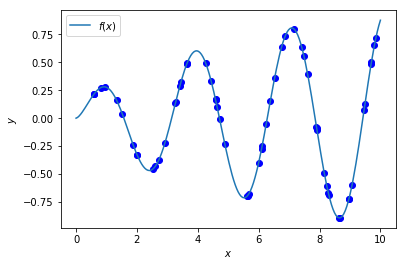

In [43]:
# Figure
pl.plot(x, yt, 'bo')
pl.plot(xts, yts,label = r'$f(x)$') 
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
pl.legend()
pl.show()

## Etape 1.2 :  ajouter du bruit
Afin d'obtenir des données plus réalistes, une approche courante consiste à ajouterdu bruit à $y$.
Ici, on jaoute un bruit blanc Gaussien d'écart-type *sigma*.

Que représente d'après-vous la première Figure ?

In [48]:
#  niveau de bruit
rd.setSigma(1)

#  Ajouter le bruit Gaussien
y = rd.addNoise(yt)

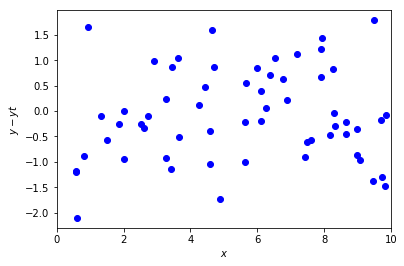

In [49]:
pl.plot(x, y-yt, 'bo') 
pl.ylabel(r'$y-yt$')
pl.xlabel(r'$x$')
pl.xlim(rd.xmin,rd.xmax)
pl.show()

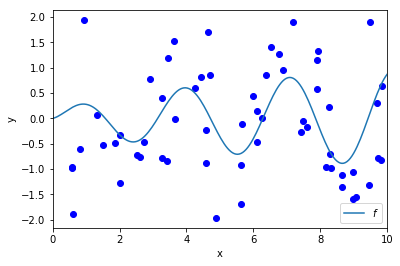

In [50]:
# Données
pl.plot(x, y, 'bo') 
pl.ylabel('y')
pl.xlabel('x')
pl.xlim(rd.xmin,rd.xmax)
pl.plot(xts, yts,label = r'$f$')
pl.legend()

# Régression polynomiale
Nous allons utiliser la fonction de régression polynomiale de Numpy *numpy.polyfit()*.  
Cette dernière cherche à déterminer les coefficients $a_i$ ($1\le i \le n$), avec $n$ le degré de la fonction polynomiale, qui permettent de minimiser le coût quadratique (même coût que la régression linéaire) :
    $$\sum_{i=1}^m (y_i-f(x_i))^2 $$

On ne s'intéresse pas ici à l'algorithme de résolution (noté tout de même que l'on pourrait utilisé l'algorithme de descente de gradient.).

## Etape 1.3 :  régression polynomiale
Testons dans un premiers temps un polynome d'ordre 4.
Notez que la courbe bleue épaisse est pour $f$ tandis que la courbe verte plus fine corresponds à la fonction apprise par le modèle $\hat{f}$.

In [58]:
##############################
#      Configuration
#      =======================
#     changer la valeur de *order* pour tester des régressions polynomiales de différents degrés
order = 10
##############################

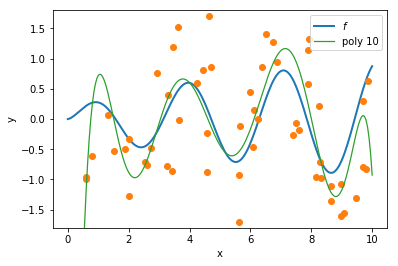

In [59]:
# plot data and the truth
pl.plot(xts, yts,label = r'$f$', linewidth=2) 
pl.plot(x, y, 'o') 
pl.ylabel('y')
pl.xlabel('x')

#  build the fitted poly curve (xts,ys) from order-th regression
ys = rd.linReg(x,y,xts,order)

#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()

Les régressions polynomiales de degré bas ne marchent pas très bien pour expliquer notre fonction $f$ complexe.

## Etape 1.4 :  Sur une fonction mystère
Nous générons ici de nouvelles données. La fonction *rd.demoReg1()* défini sa propre fonction $f$ pour générer les données.

Text(0.5,0,'$x$')

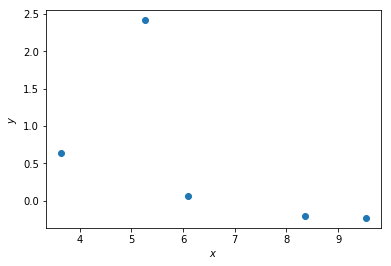

In [83]:
##############################
#      Configuration
#      =======================
#     # observations/points
m = 5
##############################

x,y = rd.demoReg1(m)
# plot 
pl.plot(x, y, 'o') 
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')

Nous allons maintenant testé différents ajustements

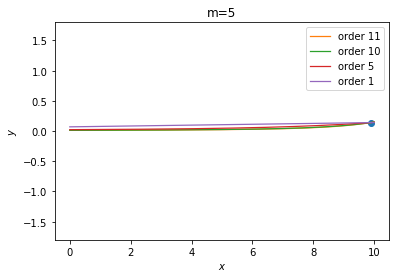

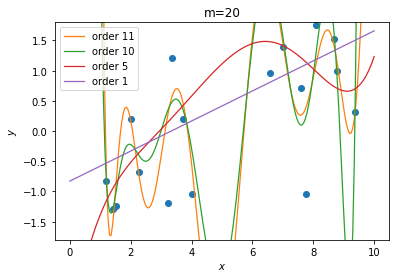

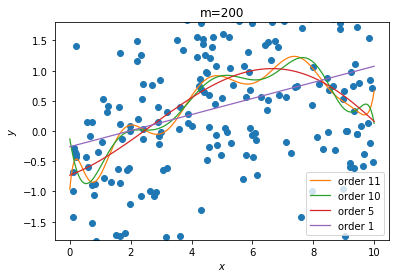

In [101]:
##############################
#      Configuration
#      =======================
#     changer la valeur de *order* pour tester des régressions polynomiales de différents degrés
def draw(m):
    
m = 1
x,y = rd.demoReg1(m)
# plot
pl.figure()
pl.title("m=5")
pl.plot(x, y, 'o') 
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
order = 11
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 ) 
order = 10
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 ) 
order = 5
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 )
order = 1
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()


m = 20
x,y = rd.demoReg1(m)
# plot
pl.figure()
pl.title("m=20")
pl.plot(x, y, 'o') 
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
order = 11
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 ) 
order = 10
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 ) 
order = 5
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 )
order = 1
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()

m = 200
x,y = rd.demoReg1(m)
# plot
pl.figure()
pl.title("m=200")
pl.plot(x, y, 'o') 
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
order = 11
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 ) 
order = 10
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 ) 
order = 5
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 )
order = 1
ys = rd.linReg(x,y,xts,order)
pl.plot(xts, ys,label = 'order ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()

Testez pour différentes quantités de données d'apprentissage ($m$) différents types d'ajustements (*order*) et différents types de bruit.

Ecrivez un document résumant sur vos différentes observations.

<strong>
Plus on augmente le bruit plus les données se differencierons de la courbe de base<br><br>

Dans les 3 Sigmas il y a 99% des données 
    
Dans les 2 Sigmas il y a 95% des données 
   
Avec un seul Sigma il y a 70%
    
Plus on augmente l'ordre plus le resultat correspond à la courbe

Plus on a de données mieux c'est car toutes les données générées suivent la même courbe

La droite d'ordre 0 a une variance très faible

biais fort : pas capable de bien modéliser 
    
biais faible : bien capable de modeliser
    
reg lin : fort biais
    
reg log : forte variance faible biais
    
polynome d'ordre 4 : faible biais faible variance

modèle complexe : faible biais forte variance donc l'introduction de nouvelles données change totalement le rendu

modèle simple : fort biais et faible variance 


    parmaètre : betas j, ce que l'on cherche à déterminé par un algorithme
    hyper-paramètre : on les fixe nous même, lambda et le pas (Alpha)
</strong>